In [8]:
!apt-get update
!apt-get install -y libzbar0
!pip install pyzbar


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Ign:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,549 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,208 kB]
Get:14 http://archive.ubuntu.

In [9]:
from google.colab import files
uploaded = files.upload()


Saving 5f5fa831cc78451ee74ef606_SproutQR-Code-Template.jpg to 5f5fa831cc78451ee74ef606_SproutQR-Code-Template (1).jpg


http://bw-winelist-website-prod.s3-website-us-west-2.amazonaws.com/winelist-demo/


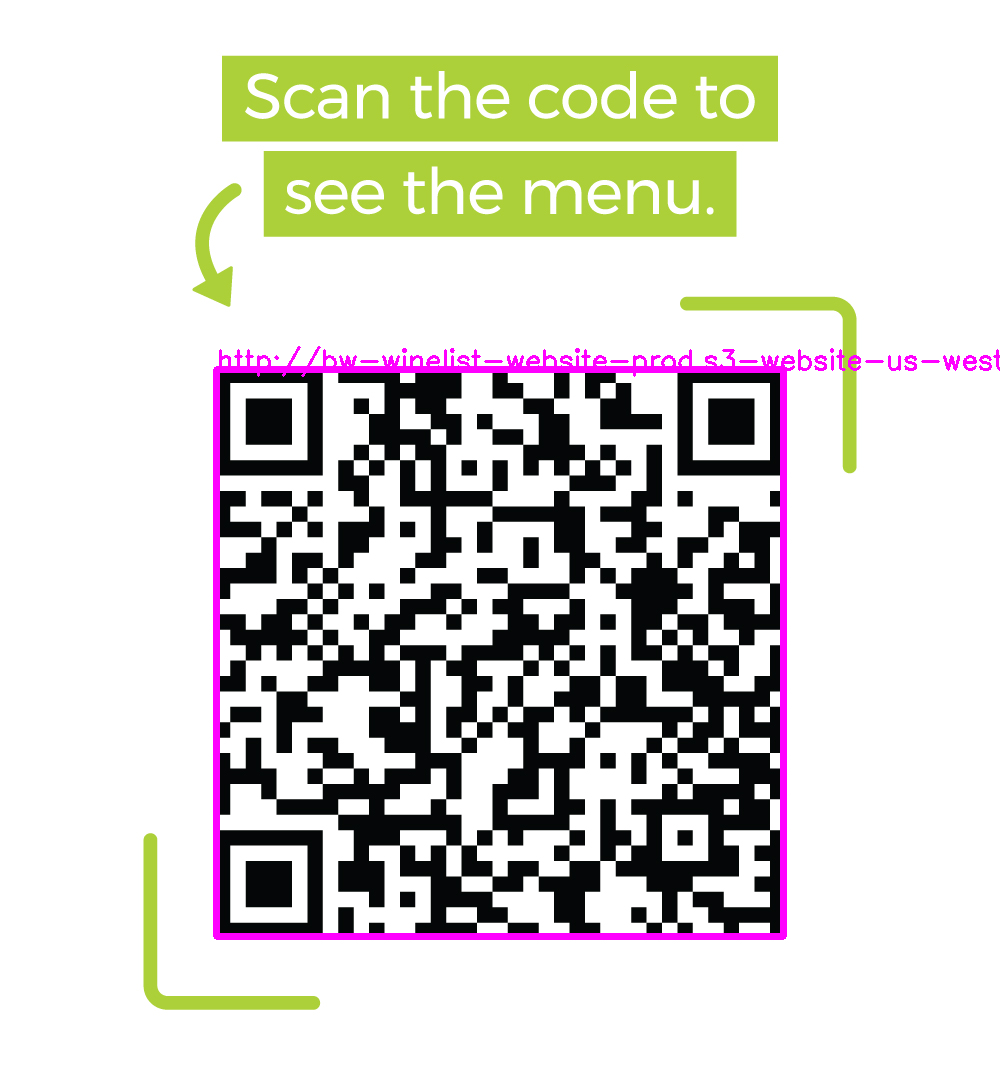

True

In [10]:
import cv2
import numpy as np
from pyzbar.pyzbar import decode

# Get the uploaded file name
image_file = list(uploaded.keys())[0]

# Read the image file
img = cv2.imread(image_file)

# Decode the barcodes in the image
for barcode in decode(img):
    myData = barcode.data.decode('utf-8')
    print(myData)

    # Draw a polygon around the barcode
    pts = np.array([barcode.polygon], np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(img, [pts], True, (255, 0, 255), 5)

    # Display the decoded data on the image
    pts2 = barcode.rect
    cv2.putText(img, myData, (pts2[0], pts2[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 255), 2)

# Display the result
from google.colab.patches import cv2_imshow
cv2_imshow(img)

# Save the processed image (optional)
cv2.imwrite("processed_image.jpg", img)
